In [3]:
from ecuaciones import Ecuaciones 
from methods import Methods as m
from experiment import Experiment as ex

import math
import pandas
import pandas as pd
import os

False
False
False
False
mutacion
False
False
mutacion
False
False
mutacion
mutacion
False
False
mutacion
False
False
mutacion
False
mutacion
mutacion
False
False
mutacion
mutacion
mutacion
False
False
False
mutacion
False
False
False
mutacion
False
False
mutacion
False
mutacion
False
mutacion
False
mutacion
False
False
False
False
mutacion
mutacion
False
False
mutacion
False
False
mutacion
mutacion
False
mutacion
False
mutacion
False
mutacion
False
False
False
False
False
False
mutacion
mutacion
False
False
False
mutacion
False
mutacion
False
mutacion
False
mutacion
False
False
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
False
mutacion
mutacion
False
False
mutacion
False
mutacion
False
mutacion
False
mutacion
False
False
False
mutacion
mutacion
False
mutacion
mutacion
False
False
mutacion
mutacion
False
False
False
False
mutacion
False
False
False
False
mutacion
False
mutacion
mutacion
mutacion
False
False
False
False
False
mutacion
mutacion
False
False
False
m

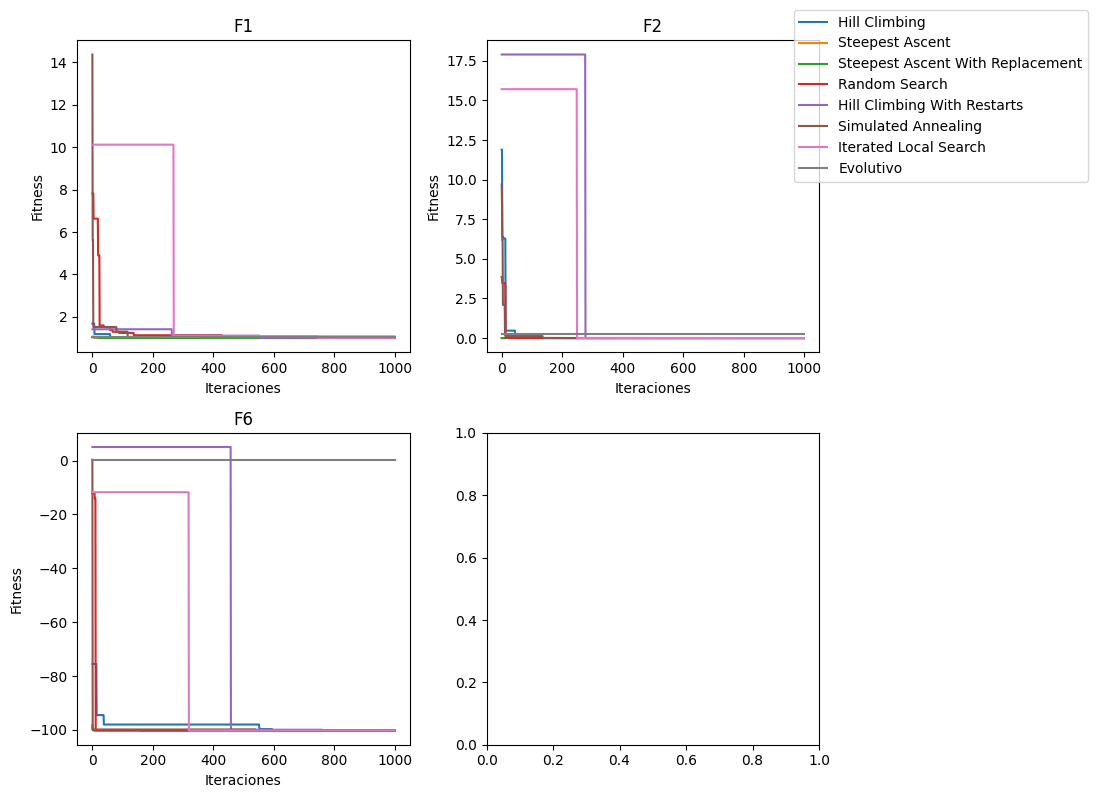

False
False
False
mutacion
mutacion
False
mutacion
False
False
mutacion
mutacion
False
False
mutacion
False
False
mutacion
False
mutacion
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
False
mutacion
False
False
mutacion
mutacion
mutacion
False
False
mutacion
False
False
False
False
mutacion
False
mutacion
False
mutacion
mutacion
False
mutacion
False
False
False
mutacion
mutacion
False
False
False
False
mutacion
False
mutacion
False
mutacion
False
False
mutacion
mutacion
False
False
False
False
mutacion
False
mutacion
False
mutacion
False
mutacion
False
False
False
mutacion
mutacion
False
mutacion
False
False
False
False
mutacion
False
False
mutacion
mutacion
False
mutacion
False
False
False
False
mutacion
mutacion
False
mutacion
False
False
False
False
False
False
mutacion
False
mutacion
False
False
False
False
False
mutacion
False
False
False
mutacion
False
mutacion
mutacion
False
mutacion
mutacion
False
False
mutacion
False
False
mutacion
mutacion
False
mutacio

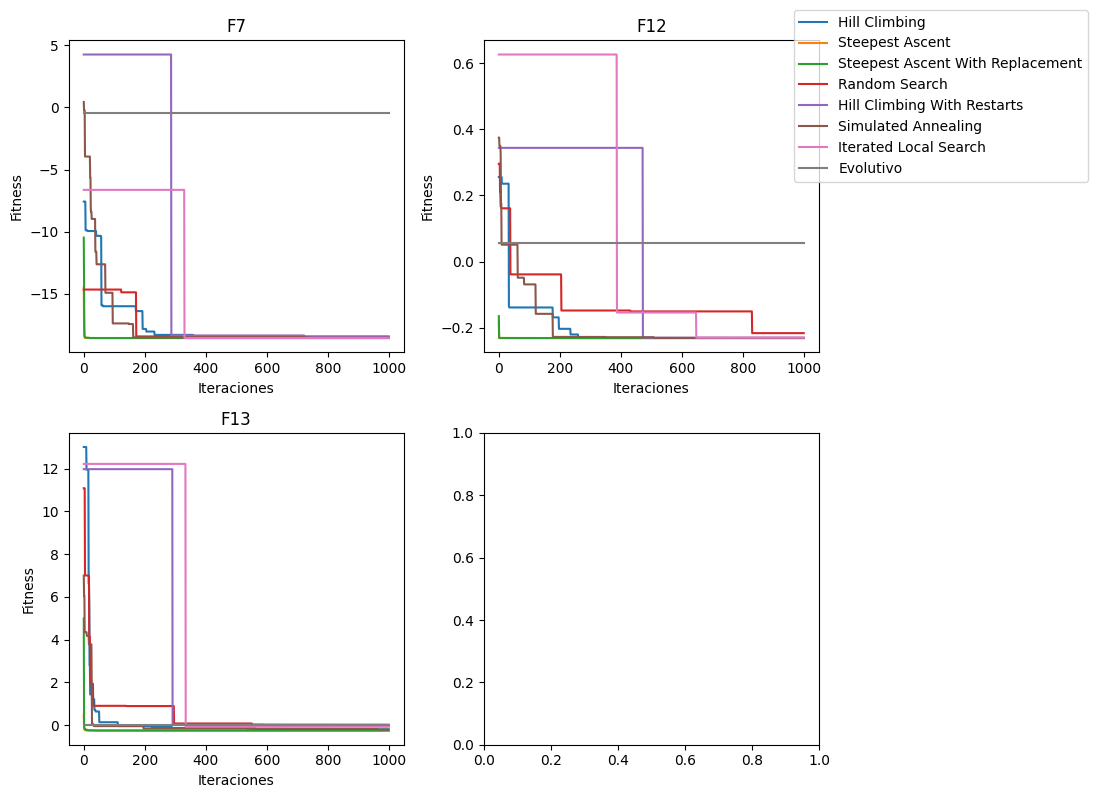

False
False
False
False
False
False
mutacion
False
False
mutacion
False
False
False
mutacion
False
mutacion
False
False
False
False
False
False
False
False
False
False
False
mutacion
False
False
False
False
False
mutacion
False
False
False
False
mutacion
False
False
mutacion
mutacion
False
False
False
False
False
False
mutacion
False
False
False
False
mutacion
False
mutacion
False
False
False
False
False
False
False
False
False
False
mutacion
False
False
False
False
False
mutacion
False
False
False
False
False
mutacion
False
mutacion
False
False
False
False
False
False
mutacion
False
False
mutacion
False
mutacion
mutacion
False
False
False
False
False
False
False
mutacion
False
False
False
False
False
False
False
False
False
False
False
False
False
mutacion
False
mutacion
False
mutacion
mutacion
False
False
mutacion
False
mutacion
False
mutacion
False
mutacion
False
mutacion
False
False
False
False
False
mutacion
False
mutacion
False
False
False
False
False
mutacion
False
False
False
m

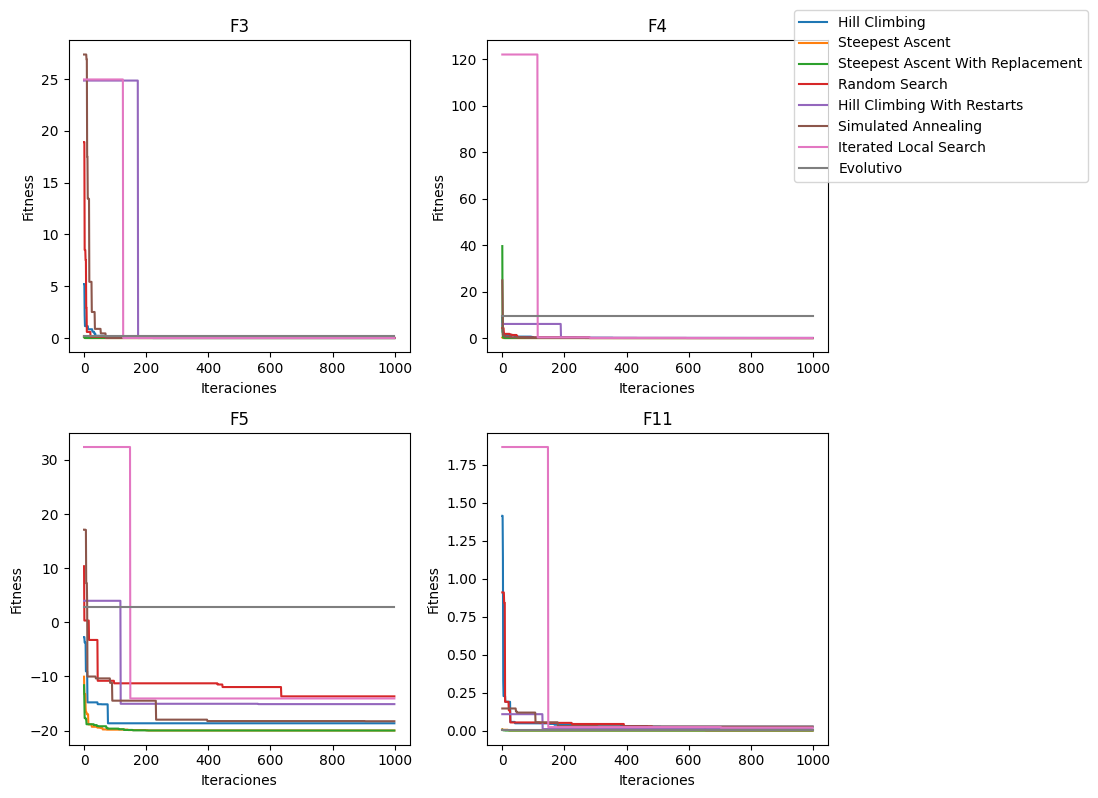

False
False
False
mutacion
False
False
False
False
False
False
False
mutacion
False
False
False
False
False
mutacion
False
False
False
False
mutacion
mutacion
mutacion
False
mutacion
False
False
mutacion
False
False
False
False
False
False
mutacion
mutacion
False
mutacion
False
False
False
False
False
False
False
False
False
False
False
False
mutacion
False
False
False
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
False
False
False
False
False
False
False
False
mutacion
False
False
mutacion
False
mutacion
False
mutacion
False
False
mutacion
False
mutacion
False
False
mutacion
False
False
False
mutacion
False
False
False
False
mutacion
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
mutacion
False
False
False
mutacion
mutacion
False
False
mutacion
False
False
False
False
mutacion
False
mutacion
False
False
False
muta

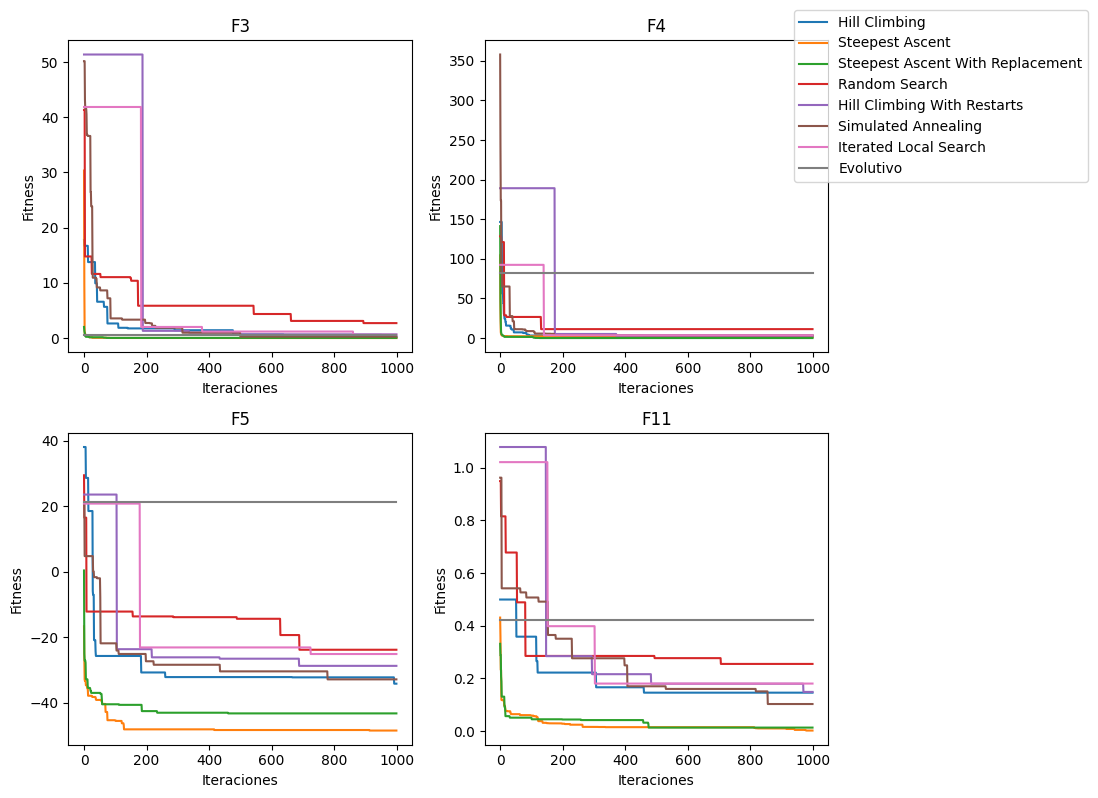

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
mutacion
False
False
False
False
mutacion
False
False
mutacion
False
False
False
False
False
False
False
mutacion
False
False
False
False
False
False
False
mutacion
False
False
mutacion
False
mutacion
mutacion
False
False
False
False
mutacion
False
mutacion
False
False
mutacion
False
mutacion
mutacion
mutacion
False
mutacion
False
False
False
mutacion
False
mutacion
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
mutacion
False
mutacion
False
mutacion
mutacion
False
False
mutacion
mutacion
False
mutacion
False
False
False
mutacion
False
False
False
False
False
False
False
False
mutacion
False
False
False
mutacion
False
False
False
mutacion
False
False
False
mutacion
False
False
mutacion
False
False
False
False
False
False
False
False
mutacion
False
mutacion
False
False
False
False
False
mutacion
mutacion
False
False
False
False
muta

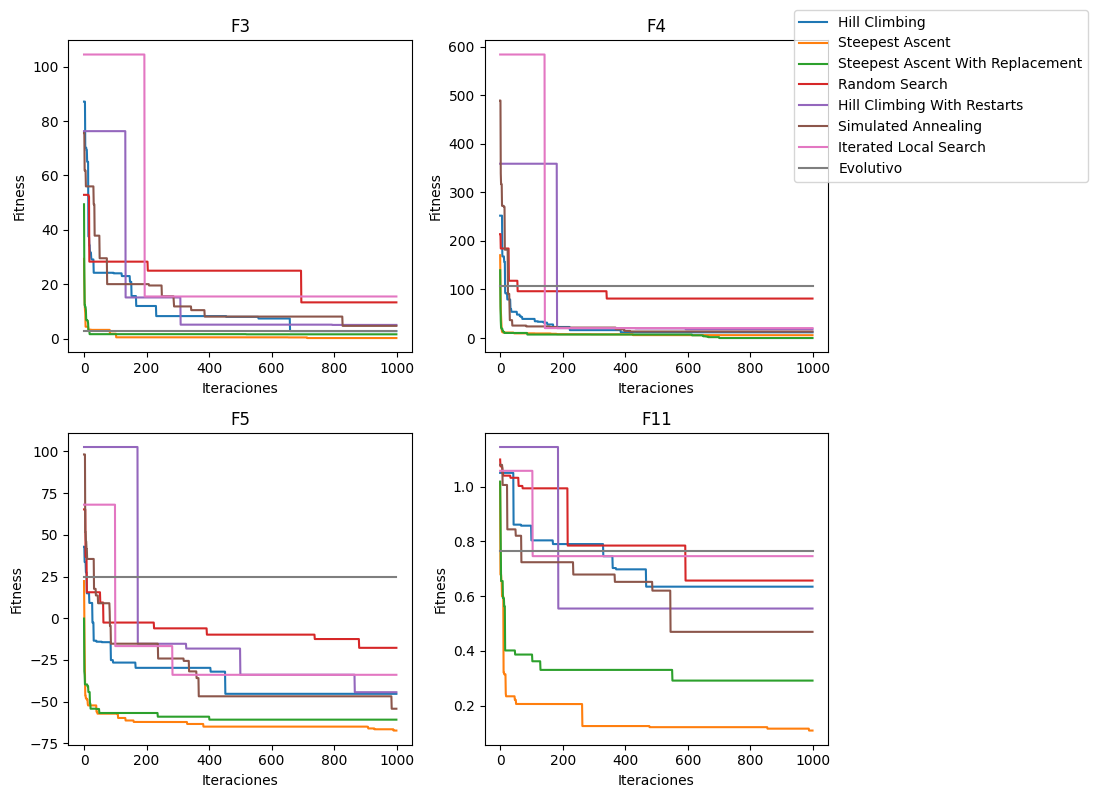

False
False
False
mutacion
False
False
False
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
False
False
mutacion
False
False
False
False
False
mutacion
False
False
False
False
False
False
False
mutacion
False
mutacion
False
False
mutacion
False
mutacion
False
False
False
False
False
False
False
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
False
False
mutacion
False
mutacion
False
False
False
False
False
mutacion
False
False
False
False
False
False
False
mutacion
mutacion
False
mutacion
False
False
False
False
False
mutacion
mutacion
mutacion
False
False
mutacion
False
mutacion
False
mutacion
False
mutacion
mutacion
False
False
False
False
mutacion
False
mutacion
False
False
False
mutacion
False
False
False
mutacion
False
False
mutacion
False
False
False
mutacion
False
False
False
mutacion
False
mutacion
False
False
False
False
False
False
False
False
False
False
False
mutacion
False
False
False
mutacion
False
False
False
False
False
False
F

KeyboardInterrupt: 

In [4]:
import experiment

experiment.Experiment.experiment(1, 1000)

In [5]:
xd = m(-5,5)
func = Ecuaciones.F3

ola = xd.evolutionary_algorithm(func, 10, 1000,0.8,0.1,1000, False)

False
False
False
False
False
False
mutacion
False
False
mutacion
False
False
False
False
mutacion
False
False
False
False
mutacion
False
mutacion
False
False
False
False
False
False
mutacion
mutacion
mutacion
False
False
mutacion
mutacion
False
False
mutacion
False
False
False
False
mutacion
False
False
False
False
False
False
False
mutacion
mutacion
False
False
False
False
mutacion
mutacion
False
False
False
False
False
False
mutacion
False
mutacion
False
mutacion
False
False
mutacion
False
mutacion
False
False
mutacion
False
False
mutacion
mutacion
False
mutacion
mutacion
False
False
False
False
False
False
False
mutacion
False
False
False
False
False
mutacion
mutacion
False
mutacion
False
False
mutacion
False
mutacion
mutacion
False
mutacion
False
mutacion
mutacion
False
mutacion
mutacion
False
mutacion
False
False
False
mutacion
False
False
mutacion
False
mutacion
mutacion
mutacion
mutacion
False
False
False
False
False
mutacion
False
mutacion
mutacion
False
mutacion
False
mutacio

AttributeError: 'list' object has no attribute 'items'

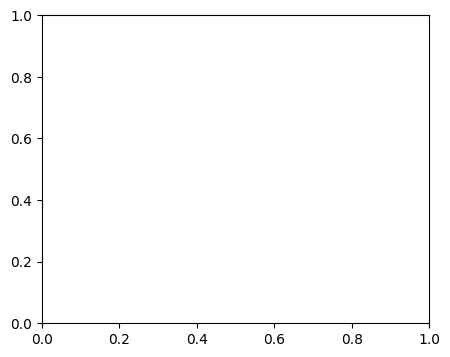

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
def convergencia(lista_convergencia, funciones):
    def plot_convergence(ax, data, title):
        for method, values in data.items():
            xd = values#[x / len(values) for x in values]  # Normalizar los valores
            ax.plot(xd, label=method)  # Añadir etiqueta para la leyenda, marker = 'o'
        ax.set_title(title)
        ax.set_xlabel("Iteraciones")
        ax.set_ylabel("Fitness")
    
    n_graficas = len(lista_convergencia)
            
    n_columnas = int(np.ceil(np.sqrt(n_graficas)))
    n_filas = int(np.ceil(n_graficas / n_columnas))
    
    fig, axs = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 4))
    
    # Si hay una sola gráfica, axs no es una lista, así que lo convertimos en una lista
    if n_graficas == 1:
        axs = [axs]
    else:
        axs = axs.flatten()

    for i in range(len(lista_convergencia)):
        ecuacion = lista_convergencia[i]
        for metodo in ecuacion:
            plot_convergence(axs[i], metodo, funciones[i].__name__)
    
    # Obtener handles y labels de la primera gráfica
    handles, labels_legend = axs[0].get_legend_handles_labels()
    
    # Crear una leyenda común fuera de las gráficas
    fig.legend(handles, labels_legend, loc='upper right', bbox_to_anchor=(1.1, 1.0))
    
    # Ajustar el layout para evitar superposiciones
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustar el espacio para la leyenda
    
    plt.savefig(f'{random.randint(1,999)}.pdf')
    plt.show()
    
    
convergencia([ola], [func])